In [30]:
from models import TauModel, ExpModel
import numpy as np

In [31]:
samples = np.load('samples.npy')

In [32]:
import matplotlib.pyplot as plt

In [33]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks, savgol_filter

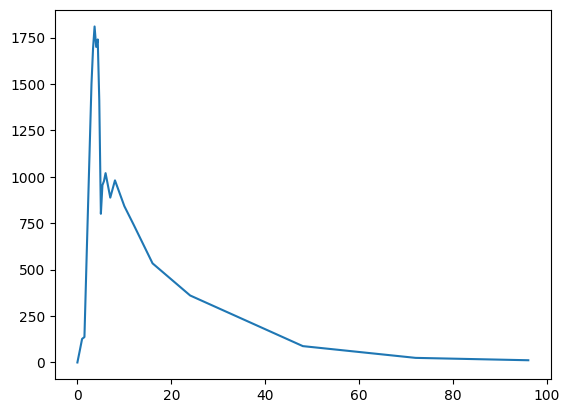

In [34]:
t, X = samples[7]
plt.plot(t, X)

In [35]:
residuals = []
for n, (t, X) in enumerate(samples):
    X_smooth = savgol_filter(X,5, 3)
    X_smooth = np.maximum(X_smooth, np.zeros_like(X_smooth))
    X_smooth[0]=0
    # plt.plot(t, X_smooth)
    
    peaks, _ = find_peaks(X_smooth)
    valleys, _ = find_peaks(-X_smooth)
    
    
    peaks = np.sort(np.concatenate([peaks, valleys]))
    t_diff = np.diff(t[peaks])
    
    # peaks = peaks[t_diff > 1.0]
    p_idx = np.concatenate([[True], t_diff >= 1.0])
    
    peaks = peaks[p_idx]
    
    # plt.vlines(t[peaks], ymin=0, ymax=2000, colors='red')
    # plt.title(f"Curve {n}")
    
    plt.show()

[ 5  7  8 15 18]


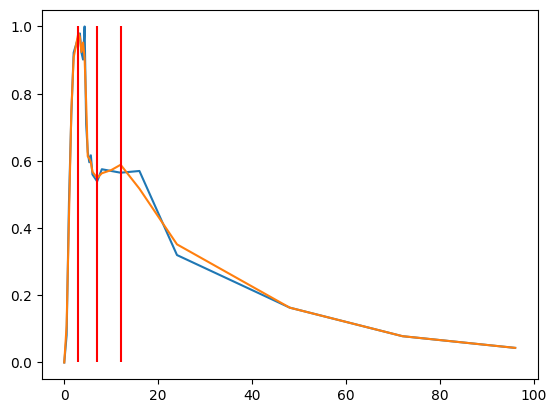

In [42]:
t, X = samples[6]
X /= np.max(X)
plt.plot(t, X)

X_smooth = savgol_filter(X, 5, 3)
X_smooth = np.maximum(X_smooth, np.zeros_like(X_smooth))
X_smooth[0] = 0
plt.plot(t, X_smooth)

peaks, _ = find_peaks(X_smooth)
valleys, _ = find_peaks(-X_smooth)


peaks = np.sort(np.concatenate([peaks, valleys]))
print(peaks)
t_diff = np.diff(t[peaks])

# peaks = peaks[t_diff > 1.0]
p_idx = np.concatenate([[True], t_diff >= 1.0])

peaks = peaks[p_idx]

plt.vlines(t[peaks], ymin=0, ymax=1, colors='red')

In [43]:
tau = t[peaks]
tau

array([ 3.,  7., 12.])

In [44]:
model = ExpModel(tau=tau, modes=["up", "down", "up", "down"])

In [45]:
model.fit(t, X)

/home/i3alumba/Projects/University/yes-science/models.py:35: RuntimeWarning: overflow encountered in exp
  np.exp(-k_el * t) - np.exp(-k_a * t)
/home/i3alumba/Projects/University/yes-science/models.py:67: RuntimeWarning: overflow encountered in square
  r = (
/home/i3alumba/Projects/University/yes-science/models.py:35: RuntimeWarning: invalid value encountered in subtract
  np.exp(-k_el * t) - np.exp(-k_a * t)


In [46]:
X_sample = model.sample(t)

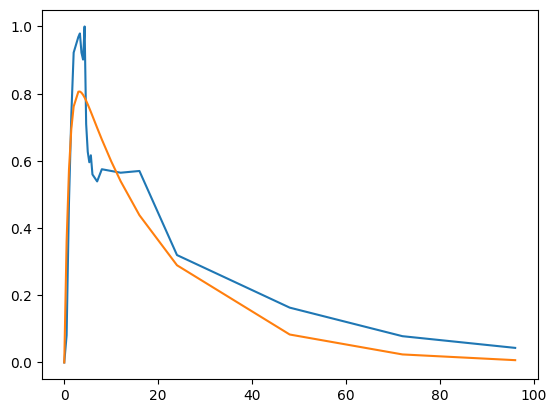

In [47]:
plt.plot(t, X)
plt.plot(t, X_sample)